## Homework 2

Hawkins Gay  
Winter 2021  
Deep Learning from Scratch

In [2]:
import autograd.numpy as np
from autograd import value_and_grad 
from autograd import hessian
from autograd.misc.flatten import flatten_func, flatten
import copy
from inspect import signature
from sklearn.metrics import accuracy_score
import os

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam, SGD

# Exercise 13.4. Nonlinear Autoencoder using neural networks

(2, 100)


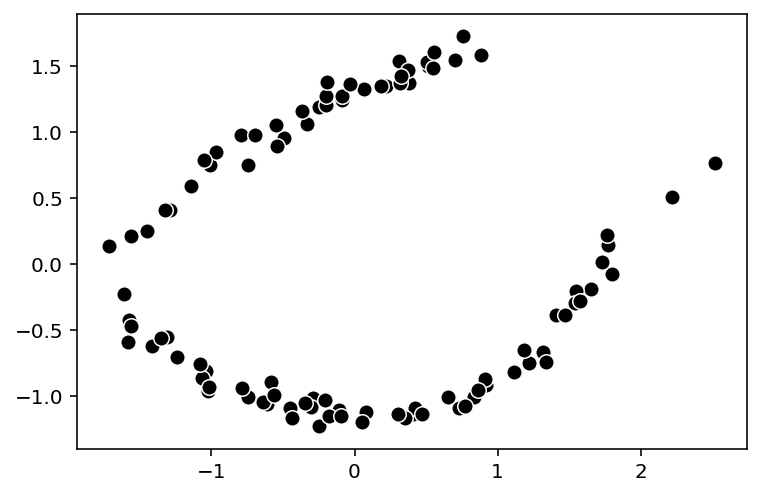

In [3]:
# import data
datapath = os.getcwd()
X = np.loadtxt(datapath + '\\data\\' + 'universal_autoencoder_samples.csv', delimiter=',')

#X = np.loadtxt(datapath + 'universal_autoencoder_samples.csv', delimiter=',')

print(np.shape(X))
plt.scatter(X[0,:], X[1,:], c = 'k', s = 60, linewidth = 0.75, edgecolor = 'w')
plt.show()

In [10]:
import pandas as pd
df = pd.DataFrame(np.transpose(X), columns = ['Column_A','Column_B'])
df2 = df.head()
print(df2)

   Column_A  Column_B
0  0.378978  1.374900
1 -0.795911  0.975549
2 -0.250113  1.191194
3  2.516429  0.767558
4  1.773897  0.142197


In [15]:
import subprocess


df2.to_html('table2.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 table2.html table2.png', shell=True)

1

In [11]:
import matplotlib.pyplot as plt
from pandas.table.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df2)  # where df is your data frame

plt.savefig('mytable.png')

ModuleNotFoundError: No module named 'pandas.table'

Create Autoencoder (3 hidden layers with 10 units in each layer and tanh activation for encoder and decoder)

In [3]:
input_size = 1
hidden_size = 10
code_size = 1

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='tanh')(input_img)
hidden_2 = Dense(hidden_size, activation='tanh')(hidden_1)
hidden_3 = Dense(hidden_size, activation='tanh')(hidden_2)
code = Dense(code_size, activation='tanh')(hidden_3)
hidden_4 = Dense(hidden_size, activation='tanh')(code)
hidden_5 = Dense(hidden_size, activation='tanh')(hidden_4)
hidden_6 = Dense(hidden_size, activation='tanh')(hidden_5)
output_img = Dense(input_size)(hidden_6)

autoencoder = Model(input_img, output_img)
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [4]:
autoencoder.compile(optimizer='SGD', loss='mean_squared_error')

#reshape X to fit autoencoder dimensions:
input_X = np.reshape(X, 200)
print(np.shape(input_X))
autoencoder.fit(input_X, input_X, epochs=1000)

(200,)
Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 1.3680
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.5798
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2082
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0773
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0713
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0673
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0604
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0568
Epoch 11/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.0539
Epoch 12/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0497
Epoch 13/1000
7/7 [=======================

7/7 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 204/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 205/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 206/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 207/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 208/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 209/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 210/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 211/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0039
Epoch 212/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 213/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 214/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 215/1000
7/7 [=======================

7/7 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 305/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 306/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 307/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 308/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 309/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 310/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 311/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 312/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 313/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 314/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 315/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 316/1000
7/7 [=======================

7/7 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 506/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 507/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 508/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 509/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 510/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 511/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 512/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 513/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 514/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 515/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 516/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 517/1000
7/7 [=======================

7/7 [==============================] - ETA: 0s - loss: 0.003 - 0s 2ms/step - loss: 0.0034
Epoch 707/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 708/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 709/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 710/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 711/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 712/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 713/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 714/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 715/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 716/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 717/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 718/1000
7/7 

7/7 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 908/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 909/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 910/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 911/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 912/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 913/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 914/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 915/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 916/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 917/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 918/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 919/1000
7/7 [=======================

In [5]:
reconstructed = autoencoder.predict(input_X)
new_img = reconstructed.reshape(2,100)
print(new_img)

[[ 0.29553986 -0.863928   -0.30640465  2.1966927   1.729205    0.23015672
  -1.5150961   0.64456636 -0.14729935  1.1800956  -0.5530345   0.14735502
  -0.25463584 -1.5064341  -1.1019717   1.0635117  -0.30305934 -0.60609096
  -0.7588108  -0.17028978  0.6720644   1.6203923   1.2849976  -1.5206398
  -1.436528   -1.0912524  -0.6774905  -0.5071366  -0.25481167  0.565664
   0.75513136 -1.508765    0.3270348  -1.1220999   0.3361859   0.01252367
  -1.0883108  -1.3314872   0.8067184  -0.81054056  2.0468073  -0.81114554
  -1.3145139   1.5223695   0.8434016  -0.34576926  0.10970032 -0.2346811
  -0.60768837 -1.5975704  -0.49687243 -1.0721141  -0.8574067   0.23550448
   0.38566008  0.27002808 -0.64803004 -1.1373558  -0.15655205  0.4288284
   0.41622257  0.29155034  1.3796464   1.5164244   0.22159496 -0.36008674
   1.751436   -1.2757597  -0.24709174  1.688462   -0.39131635  1.5466082
  -0.40531775 -1.4121307  -0.14816406 -1.1929096   0.61838573 -1.5363376
  -0.00304182 -0.70312166 -0.01610869 -0.0898

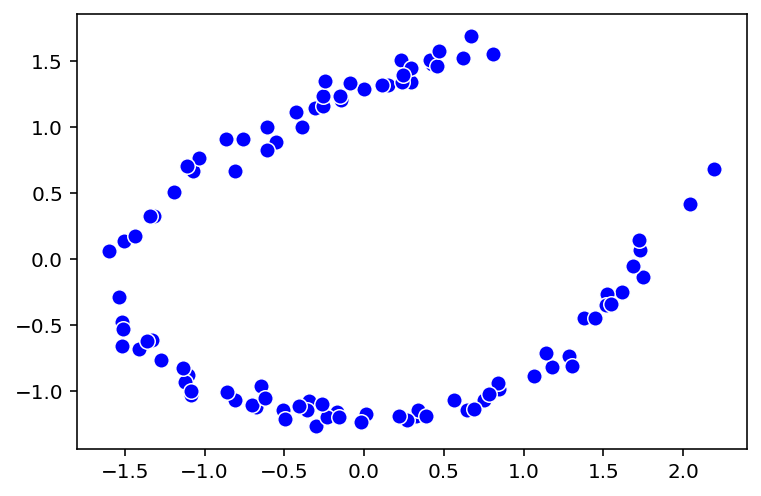

In [6]:
plt.scatter(new_img[0,:], new_img[1,:], c = 'b', s = 60, linewidth = 0.75, edgecolor = 'w')
plt.show()

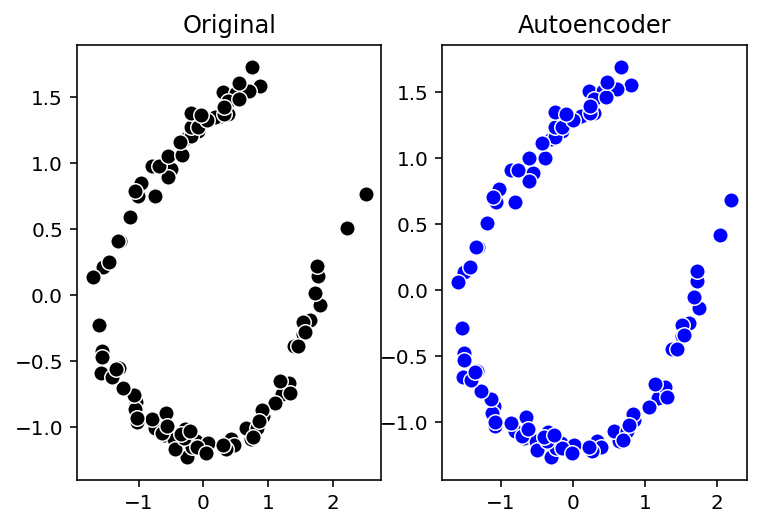

In [7]:
# Plot original image data X with autoencoder 'new_img'
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.scatter(X[0,:], X[1,:], c = 'k', s = 60, linewidth = 0.75, edgecolor = 'w')

ax2 = fig.add_subplot(122)
plt.scatter(new_img[0,:], new_img[1,:], c = 'b', s = 60, linewidth = 0.75, edgecolor = 'w')

ax1.title.set_text('Original')
ax2.title.set_text('Autoencoder')

plt.show()


# Exercise 13.8. Batch normalization

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LayerNormalization

In [9]:
# get MNIST data from online repository
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# convert string labels to integers
y = np.array([int(v) for v in y])[:,np.newaxis]

print(np.shape(x))
print(np.shape(y))

(70000, 784)
(70000, 1)


In [10]:
#Randomly choose 50,000 digits from the MINST set:
idx = np.random.choice(np.arange(len(x)), 50000, replace=False)
x_train = x[idx]
y_train = y[idx]
print(np.shape(x_train))
print(np.shape(y_train))

(50000, 784)
(50000, 1)


In [11]:
# Create 4 layer hidden NN with ReLU activation and batch normalization: 
model = Sequential([
    Dense(10, input_shape=(784,)),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
]);
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                4

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [13]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=10,
    batch_size=50000,
)

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.7634 - accuracy: 0.0865
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.1410 - accuracy: 0.2233
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 1.8448 - accuracy: 0.3751
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 1.7286 - accuracy: 0.3726
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5040 - accuracy: 0.5320
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1.4329 - accuracy: 0.4981
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.6267 - accuracy: 0.3725
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 1.9219 - accuracy: 0.3465
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 1.5541 - accuracy: 0.4390
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3339 - accuracy: 0.5271


In [14]:
# Creating same model without batch normalization: 
model_stand = Sequential([
    Dense(10, input_shape=(784,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
]);
model_stand.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
____________________________________________________

In [15]:
model_stand.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
history_stand = model_stand.fit(
    x_train, 
    y_train, 
    epochs=10,
    batch_size=50000,
)

Epoch 1/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3245 - accuracy: 0.1121
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3218 - accuracy: 0.1121
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3193 - accuracy: 0.1121
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3170 - accuracy: 0.1121
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 2.3150 - accuracy: 0.1121
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3132 - accuracy: 0.1121
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3117 - accuracy: 0.1121
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3102 - accuracy: 0.1121
Epoch 9/10
1/1 [==============================] - 0s 3ms/step - loss: 2.3090 - accuracy: 0.1121
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 2.3079 - accuracy: 0.1121


In [17]:
print(history.history.keys())
print(history_stand.history.keys())

dict_keys(['loss', 'accuracy'])
dict_keys(['loss', 'accuracy'])


In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, history_stand, metric):
    regular = history_stand.history[metric]
    batch = history.history[metric]
    epochs = range(1, 11)
    plt.plot(epochs, regular)
    plt.plot(epochs, batch)
    plt.title(metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["regular", "batch"])
    plt.show()

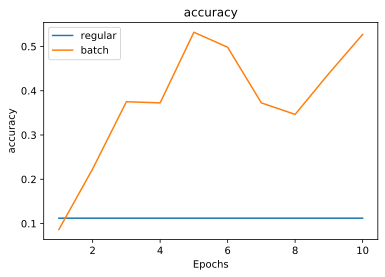

In [20]:
plot_metric(history, history_stand, "accuracy")

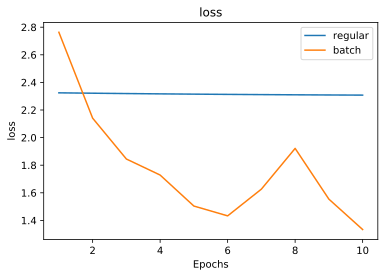

In [21]:
plot_metric(history, history_stand, "loss")

# Exercise 13.9. Early stopping cross-validation

In [22]:
# load in dataset
import pandas as pd
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

datapath = os.getcwd()
csvname = datapath + '\\data\\' + 'noisy_sin_sample.csv'
data = pd.read_csv(csvname) 
data = data.to_numpy()
x = data[:,0]
y = data[:,1]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

x_train, x_val, y_train, y_val = np.array([x_train]), np.array([x_val]), np.array([y_train]), np.array([y_val])

print(np.shape(x_val))
print(np.shape(x_train))
print(x_val)
print(y_val)


(1, 7)
(1, 14)
[[0.68608 0.85292 0.215   0.50679 0.14515 0.81336 0.41464]]
[[-0.99147 -0.97585  0.88859 -0.41632  0.75034 -1.1745   0.67935]]


In [23]:
# Building functions from textbook chapter 13:

def network_initializer(layer_sizes, scale):
    weights = [] #empty weights container
    for k in range(len(layer_sizes)-1):
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]
        
        # make weight matrix:
        weight = scale*np.random.randn(U_k+1, U_k_plus_1)
        weights.append(weight)
    
    #theta_init[0] = all weight matricies internal to the network
    #theta_init[1] = contains final layer combination weights
    theta_init = [weights[:-1], weights[-1]]
    
    return theta_init

def feature_transforms(a, w): #a = the x inputs, w = weights
    for W in w: 
        a = W[0] + np.dot(a.T, W[1:]) #comuting inner product of weights 
        a = np.tanh(a).T #utilizing the tanh activation function - can use any activation here
    return a #output of each perceptron 

def model(x, theta):
    f = feature_transforms(x, theta[0])
    a = theta[1][0] + np.dot(f.T, theta[1][1:])
    return a.T

In [24]:
#Create FFNN class to use for calculations:

class FFNN():
    def __init__(self, x_train, y_train, x_val, y_val):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val
        
    def least_squares(self, w):
        cost = np.sum((model(self.x_train, w) - self.y_train)**2)
        return cost/float(np.size(self.y_train))
    
    def least_squares_val(self, w):
        cost = np.sum((model(self.x_val, w) - self.y_val)**2)
        return cost/float(np.size(self.y_val))
    
    # gradient descent function - inputs: g (input function), alpha (steplength parameter),
    # max_its (maximum number of iterations), w (initialization)
    def gradient_descent(self, g, alpha_choice, max_its, w):
        # flatten the input function to more easily deal with costs that have layers of parameters
        g_flat, unflatten, w = flatten_func(g, w) # note here the output 'w' is also flattened

        # compute the gradient function of our input function - note this is a function too
        # that - when evaluated - returns both the gradient and function evaluations (remember
        # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
        # an Automatic Differntiator to evaluate the gradient)
        gradient = value_and_grad(g_flat)

        # run the gradient descent loop
        weight_history = []      # container for weight history
        cost_history = []        # container for corresponding cost function history
        val_cost_history = []
        alpha = 0
        for k in range(1,max_its+1):
            # check if diminishing steplength rule used
            if alpha_choice == 'diminishing':
                alpha = 1/float(k)
            else:
                alpha = alpha_choice

            # evaluate the gradient, store current (unflattened) weights and cost function value
            cost_eval,grad_eval = gradient(w)
            weight_history.append(unflatten(w))
            cost_history.append(cost_eval)
            val_cost_history.append(self.least_squares_val(unflatten(w)))

            # take gradient descent step
            w = w - alpha*grad_eval

        # collect final weights
        weight_history.append(unflatten(w))
        # compute final cost function value via g itself (since we aren't computing 
        # the gradient at the final step we don't get the final cost function value 
        # via the Automatic Differentiatoor) 
        cost_history.append(g_flat(w))
        val_cost_history.append(self.least_squares_val(unflatten(w)))
        return weight_history, cost_history, val_cost_history
    
    def fit(self, layer_sizes, scale, max_its, alpha_choice):
        # basic parameters for gradient descent run
        w = network_initializer(layer_sizes, scale)
        self.weight_history, self.cost_history, self.val_cost_history = self.gradient_descent(self.least_squares, alpha_choice, max_its, w)
        return self.weight_history, self.cost_history, self.val_cost_history


In [28]:
weight_list = [1, 10, 10, 10, 1]

nn = FFNN(x_train, y_train, x_val, y_val)
results = nn.fit(weight_list, 1, 3000, 0.03)

print(np.shape(results))

(3, 3001)


In [29]:
def plot_metric(results):
    train_loss = results[1]
    val_loss = results[2]
    plt.plot(range(0, len(train_loss)), train_loss)
    plt.plot(range(0, len(val_loss)), val_loss)
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["training", "validation"])
    plt.ylim(0,2)
    plt.show()

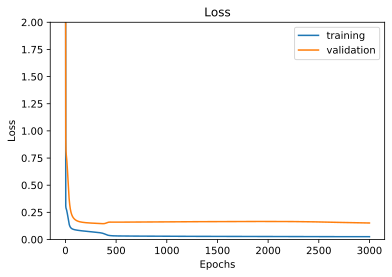

In [30]:
plot_metric(results)

You can see from the graph above the lines begin to seperate, with the validation loss increasing aroung 400, which is where I will take my weights from for the final model.

In [58]:
# Create a smoothe number list: 
smoothe = np.arange(0.0, 1.0, 0.01)
print(smoothe)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


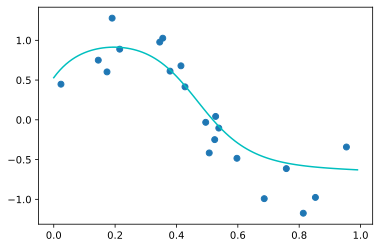

In [59]:
# Creating the sample regression line to plot over the actual points:

weights = results[0][400]
prediction = model(np.array([smoothe]), weights)
prediction = prediction[0]

plt.scatter(x, y)
plt.plot(smoothe, prediction, '-c')
plt.show()


# Exercise 13.10. Handwritten digit recognition using neural networks

In [60]:
# get MNIST data from online repository
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# convert string labels to integers
y = np.array([int(v) for v in y])[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.142857, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.166666, random_state=42)

print(np.shape(x_train))
print(np.shape(y_train))

print(np.shape(x_val))
print(np.shape(y_val))

(50000, 784)
(50000, 1)
(10000, 784)
(10000, 1)


Creating the NN for the MINST training: two dense layers with 100 units. 

In [61]:
model = Sequential([
    Dense(784, input_shape=(784,)),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
]);
model_stand.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
Total params: 8,400
Trainable params: 8,400
Non-trainable params: 0
____________________________________________________

SGD optimizer, mini-batches of 500, and 100 epochs of training

In [62]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [63]:
history = model.fit(
    x_train, 
    y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=500,
)

Epoch 1/100
100/100 [==============================] - 7s 69ms/step - loss: 0.2946 - accuracy: 0.9086 - val_loss: 0.1956 - val_accuracy: 0.9375
Epoch 2/100
100/100 [==============================] - 7s 66ms/step - loss: 0.1299 - accuracy: 0.9603 - val_loss: 0.1600 - val_accuracy: 0.9500
Epoch 3/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0948 - accuracy: 0.9708 - val_loss: 0.1129 - val_accuracy: 0.9628
Epoch 4/100
100/100 [==============================] - 7s 68ms/step - loss: 0.0763 - accuracy: 0.9759 - val_loss: 0.1192 - val_accuracy: 0.9634
Epoch 5/100
100/100 [==============================] - 7s 73ms/step - loss: 0.0611 - accuracy: 0.9803 - val_loss: 0.0932 - val_accuracy: 0.9709
Epoch 6/100
100/100 [==============================] - 8s 81ms/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.1032 - val_accuracy: 0.9693
Epoch 7/100
100/100 [==============================] - 8s 78ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0898 - val_accuracy:

In [64]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [65]:
def plot_metric(history, metric, metric_2):
    metric = history.history[metric]
    metric_2 = history.history[metric_2]
    plt.plot(range(0, len(metric)), metric)
    plt.plot(range(0, len(metric_2)), metric_2)
    plt.title('Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["training", "validation"])
    #plt.ylim(0,2)
    plt.show()
    

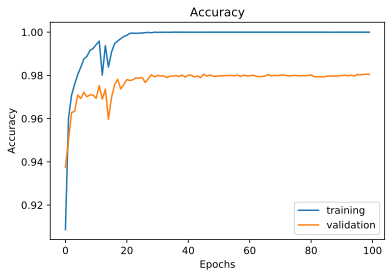

In [66]:
plot_metric(history, 'accuracy', 'val_accuracy')

In [67]:
def plot_metric(history, metric, metric_2):
    metric = history.history[metric]
    metric_2 = history.history[metric_2]
    plt.plot(range(0, len(metric)), metric)
    plt.plot(range(0, len(metric_2)), metric_2)
    plt.title('Cost')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["training", "validation"])
    #plt.ylim(0,2)
    plt.show()

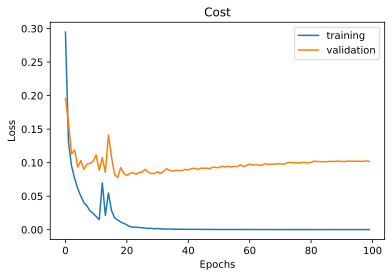

In [68]:
plot_metric(history, 'loss', 'val_loss')